# GROUP  MEMBERS
1- Doaa Mohamed    106413

2- Inês Leite      92928

3- Pedro Marques  92926

# Turbo Engine data description

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT).

In [ ]:
df_train = pd.read_csv('dataTopicF/train_FD001.csv')
df_train.columns


***Goal***
-------------------------
During operation, degradation occurs in each of the components. If degradation level in any component exceeds a threshold, the engine is said to have failed. We don't want jet engines to fail mid-air. Therefore, jet engines are inspected before every take off. This is a form of periodic maintenance that is not cost effective.

But given the critical nature of operation (considering human lives involved), this form of maintenance strategy is justified. Even then, we need a system that can given us early warning if something is going to fail.

An early warning, in many cases, may help us prepare for the problem, if not prevent it altogether. A sufficiently early warning will enable us to prevent the disaster. But if an early warning is too conservative, it will lead to unnecessary waste of money. So, aim of Classifiction is to determine which is already failed and we have to replace it early to avoid the consequences effects

***Objectives***
-------------------------
    - Load Data
    - Data Cleaning
    - Class Imbalance
    - Data Extraction
    - Building Random Forest
    - BUILD OPTIMAL SVM CLASSIFIER
    - Preliminary / Unoptimized Model
    - Model Performance (Unoptimized)
    - Optimize SVM parameters
    - Final SVM with optimal parameters
    - Model Performance (Optimized)
    - Multi-Layer Perceptron Neural Network 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
from sklearn.svm import SVC # make support vector machine for classification
from sklearn.metrics import plot_confusion_matrix # draws confusion matrix
from sklearn import preprocessing

## Load Data

In [4]:
df_train = pd.read_csv('dataTopicF/train_FD001.csv')
df_train

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,no
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,no
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,no
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,no
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,yes
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,yes
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,yes
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,yes


In [5]:
df_test = pd.read_csv('test_FD001.csv', sep=';')
df_test

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,no
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,no
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,no
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,no
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,yes
13092,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,yes
13093,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,yes
13094,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,yes


## Cleaning
- Missing values check
    - dataframes have no missing values.
- Duplicate rows check
    - dataframes have no duplicated values.
  

In [6]:
print(f"Number of variables: {len(df_train.columns)}")
print(f"Number of observations: {df_train.shape[0]}")
print(f"Missing Values: {df_train.isna().sum().sum()}")
print(f"Missing Values : {round(df_train.isna().sum().sum()/df_train.shape[0]*100,3)}")
print(f"Duplicate rows: {df_train[df_train.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(df_train[df_train.duplicated(keep='first')].shape[0]/df_train.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(df_train.dtypes,columns="Count")
for i in pd.crosstab(df_train.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

Number of variables: 25
Number of observations: 20631
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int64 2
	float64 22
	object 1


In [7]:
print(f"Number of variables: {len(df_test.columns)}")
print(f"Number of observations: {df_test.shape[0]}")
print(f"Missing Values: {df_test.isna().sum().sum()}")
print(f"Missing Values : {round(df_test.isna().sum().sum()/df_test.shape[0]*100,3)}")
print(f"Duplicate rows: {df_test[df_test.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(df_test[df_test.duplicated(keep='first')].shape[0]/df_test.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(df_test.dtypes,columns="Count")
for i in pd.crosstab(df_test.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

Number of variables: 25
Number of observations: 13096
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int64 2
	float64 22
	object 1


## Class Imbalance

The distribution of Failure status is important because it speaks to class imbalance within machine learning and data mining applications. Class imbalance is a term used to describe when a target class within a data set is outnumbered by another target class (or classes). This can create misleading accuracy metrics, known as an accuracy paradox. To make sure our target classes aren't imbalanced, create a function that will output the distribution of the target classes.

In [8]:
def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [10]:
print_dx_perc(df_train, 'Failure_status')

no accounts for 84.97% of the Failure_status column
yes accounts for 15.03% of the Failure_status column


In [11]:
print_dx_perc(df_test, 'Failure_status')

no accounts for 67.27% of the Failure_status column
yes accounts for 32.73% of the Failure_status column


Fortunately, this data set does not suffer from class imbalance.

## Data Extraction
- obtain the X features and Y target variables for training and test dataset

In [12]:
#define the training dataset
X_train = df_train.iloc[:,0:-1]
Y_train = df_train.iloc[:,-1]

In [13]:
#define the test dataset
X_test = df_test.iloc[:,0:-1]
Y_test = df_test.iloc[:,-1]

In [14]:
print(f"Dataset     | Size/Length")
print("-"*40)
print(f"Training X  | {X_train.shape}")
print(f"Training y  | {Y_train.shape}")
print(f"Testing X   | {X_test.shape}")
print(f"Testing y   | {Y_test.shape}")

Dataset     | Size/Length
----------------------------------------
Training X  | (20631, 24)
Training y  | (20631,)
Testing X   | (13096, 24)
Testing y   | (13096,)


# Building Random Forest

In [15]:
RF = RandomForestClassifier()

In [16]:
RF.fit(X_train,Y_train)

RandomForestClassifier()

<AxesSubplot:>

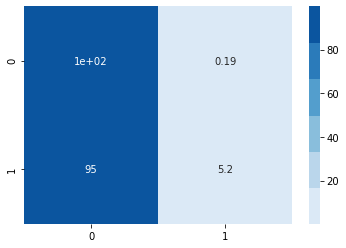

In [17]:
Y_pred_RF = RF.predict(X_test)

#create the confusion matrix

cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)



In [18]:
accuracy_score(Y_test, Y_pred_RF)
print(f"Accuracy: {(accuracy_score(Y_test, Y_pred_RF)*100)}%")

Accuracy: 68.85308491142334%


# BUILD OPTIMAL SVM CLASSIFIER
- Preliminary / Unoptimized Model
- Model Parameters Optimization
- Final Optimized Model and Conclusion

## Preliminary / Unoptimized Model
- build an unoptimized svm classifier for the training dataset
- plot and draw confusion matrix to see how it performs on the testing dataset.
- analyze clasification report.
- evaluate model performance

In [19]:
clf_svm_unoptimized = SVC(random_state=42)
clf_svm_unoptimized.fit(X_train, Y_train)

SVC(random_state=42)

Text(0.5, 1.0, 'Unoptimized Confusion Matrix')

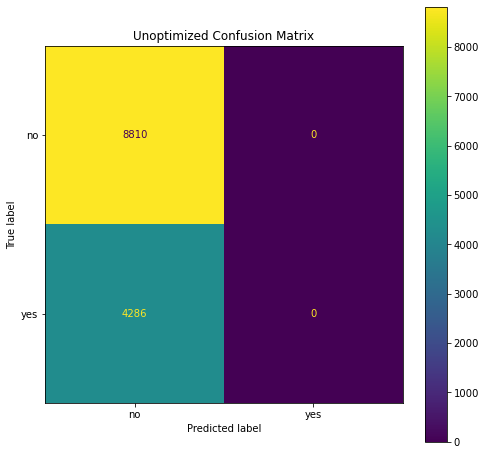

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

plot_confusion_matrix(
    clf_svm_unoptimized,
    X_test,
    Y_test,
    values_format='d',
    ax=ax
)
plt.title('Unoptimized Confusion Matrix') 

## Model Performance (Unoptimized)
- obtain predicted values given the test data
- compute the accuracy of the classifier
- obtain the classification report

In [21]:
preds = clf_svm_unoptimized.predict(X_test)
print(f"Accuracy: {(accuracy_score(Y_test,preds)*100)}%")

Accuracy: 67.2724496029322%


In [22]:
print(preds)
print(Y_test)

['no' 'no' 'no' ... 'no' 'no' 'no']
0         no
1         no
2         no
3         no
4         no
        ... 
13091    yes
13092    yes
13093    yes
13094    yes
13095    yes
Name: Failure_status, Length: 13096, dtype: object


In [23]:
print(classification_report(Y_test,preds))

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.67      1.00      0.80      8810
         yes       0.00      0.00      0.00      4286

    accuracy                           0.67     13096
   macro avg       0.34      0.50      0.40     13096
weighted avg       0.45      0.67      0.54     13096



## Optimize SVM parameters
- we define some set of dafault values for the parameters C and gamma and the kernels to check for best fit.
- the best kernel turned out to be 'rbf'. All the time.

In [ ]:
#this take long time for my laptop so, i assumed the below values
#but i will try to check it latter again
"""
param_grid = [
    {
        'C':[0.5,1,10],
        'gamma':['scale',1, 0.1, 0.01, 0.001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

C,g,k = optimal_params.fit(X_train, Y_train).best_params_.values()
""""

In [ ]:
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")

In [24]:
C = 100
g = 0.01
k = 'rbf'

## Final SVM with optimal parameters
- refit the svm model with the optimal parameters acquired.
- an overall improvement compared to the prior unoptimized svm model.

In [25]:
clf_svm = SVC(random_state=42, C=C, gamma=g, kernel=k)
clf_svm.fit(X_train, Y_train)

SVC(C=100, gamma=0.01, random_state=42)

Text(0.5, 1.0, 'Optimized Confusion Matrix')

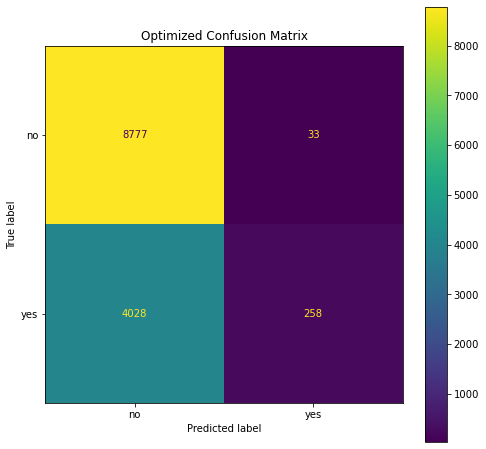

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(
    clf_svm,
    X_test,
    Y_test,
    values_format='d',
    
    ax=ax
)

plt.title('Optimized Confusion Matrix') 

## Model Performance (Optimized)
- obtain predicted values given the test data
- compute the accuracy of the classifier
- obtain the classification report

In [27]:
preds = clf_svm.predict(X_test)
print(f"Accuracy: {(accuracy_score(Y_test,preds)*100)}%")

Accuracy: 68.99053145998778%


In [28]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

          no       0.69      1.00      0.81      8810
         yes       0.89      0.06      0.11      4286

    accuracy                           0.69     13096
   macro avg       0.79      0.53      0.46     13096
weighted avg       0.75      0.69      0.58     13096



## Multi-Layer Perceptron Neural Network 

In [30]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df_train['Failure_status']=le.fit_transform(df_train['Failure_status'])
df_test['Failure_status']=le.fit_transform(df_test['Failure_status'])

In [31]:


# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,Y_train)

Iteration 1, loss = 6.91740573
Iteration 2, loss = 0.53654253
Iteration 3, loss = 0.46207335
Iteration 4, loss = 0.43545521
Iteration 5, loss = 0.42682538
Iteration 6, loss = 0.42413591
Iteration 7, loss = 0.42339920
Iteration 8, loss = 0.42321761
Iteration 9, loss = 0.42319318
Iteration 10, loss = 0.42317257
Iteration 11, loss = 0.42318135
Iteration 12, loss = 0.42319007
Iteration 13, loss = 0.42318940
Iteration 14, loss = 0.42319921
Iteration 15, loss = 0.42318362
Iteration 16, loss = 0.42318036
Iteration 17, loss = 0.42319652
Iteration 18, loss = 0.42321157
Iteration 19, loss = 0.42319377
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [33]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(Y_test,ypred)

0.6727244960293219